# Student Performance Analysis Project
## 📚 성적 분석 프로젝트

# 목차
#### 1. 데이터 분석 목표

#### 2. Data Description & Library

#### 3. EDA (데이터 분석)

    ▪ 3-1. 데이터셋 기본 정보 탐색
    
    ▪ 3-2. 개별 feature 탐색
    

#### 4. 기준 모델 정하기

#### 5. 데이터 전처리 와 feature engineering

    ▪ 5-1. 필요없는 컬럼 제거
          
    ▪ 5-2. 타겟 데이터와 특성 데이터로 분류   

    ▪ 5-3. One-Hot-Encoding
    
        (1) 산점도 확인
        (2) 상관계수 시각화
        (3) 상관계수 Top5
    
    ▪ 5-4. Training set / Test set 나누기

    ▪ 5-5. SelectKBest
    
    

#### 6. 머신러닝 모델 학습 및 평가

    ▪ 6-1. Linear Regression 모델 학습 및 평가
    
    ▪ 6-2. RidgeCV를 사용한 회귀모델 학습 및 평가
    
    ▪ 6-3. 하이퍼파라미터 조절
    
    ▪ 6-4. 다양한 파이프라인 만들어서 모델 학습 및 평가
    

#### 7. 최종 테스트 값 확인 & SHAP 시각화

    ▪ 7-1. 실제 점수값과 최종 모델이 예측한 값 비교
    
    ▪ 7-2. SHAP 시각화
    

## 1. 데이터 분석 목표

● 성적과 연관이 없어보이는 다양한 환경 요건이 학생들의 성적에 영향을 줄 수 있는지 알아보겠습니다.

● 성적 데이터를 바탕으로 학생들의 성적에 영향을 미치는 요소를 분석하여, 성적을 예측하는 모델을 만들어봅니다.

● 성적에 영향을 미치는 특성을 파악하고 학생들에게 더 나은 교육 환경을 제공하는 것이 프로젝트의 목표입니다.


## 2. Data Description


### ▶ feature Description
▸ Dataset : Kaggle (test_scores)

▸ school : 학교 번호

▸ school_setting : 학교 위치 (Urban, Suburban, Rural)

▸ school_type : 학교 종류 (Public, Non-public)

▸ classroom : 교실 유형

▸ teaching_method : 학습 방법

▸ n_student : 학생수

▸ student_id : 학생 id

▸ gender : 성별

▸ lunch : 점심 여부 (Does not qualify, Qualifies for reduced/free lunch)

▸ pretest : 이전 성적

▸ posttest : 이후 성적

### ▶ 사용할 Library

In [123]:
import sklearn
import xgboost
import shap


# 넘파이
import numpy as np

# 판다스
import pandas as pd

# 시각화
import matplotlib.pyplot as plt
import seaborn as sns

# 프로파일링
from pandas.plotting import scatter_matrix

# scatter_matrix
from pandas_profiling import ProfileReport

# 사이킷런 - 데이터 셋 나누기
from sklearn.model_selection import train_test_split

# 사이킷런 - encoders & imputers
from category_encoders import OneHotEncoder
from category_encoders import OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer, SimpleImputer

# 스케일러
from sklearn.preprocessing import StandardScaler

# 사이킷런 - 파이프라인
from sklearn.pipeline import make_pipeline

# 사이킷런 - 학습모델
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz

# 사이킷런 - 모델 평가 지표
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

# 회귀 문제의 성능 평가 지표
from sklearn.metrics import  mean_squared_error, mean_absolute_error, r2_score

#분류 모델의 성능 평가 지표
from sklearn.metrics import plot_confusion_matrix

# 모델 selection
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import f_regression, SelectKBest

# feature selection
from sklearn.feature_selection import f_regression, SelectKBest
from sklearn.feature_selection import f_regression, SelectKBest

# 다항회귀
from sklearn.preprocessing import PolynomialFeatures

# 파이프라인
from sklearn.pipeline import make_pipeline

# 결정트리 시각화
import graphviz

# 3. EDA
### 3-1. 데이터셋 기본 정보 탐색
### ▶ 전체 데이터셋

In [58]:
df = pd.read_csv('/Users/sehwajo/Desktop/csv_file/test_scores.csv')
df

,school,school_setting,school_type,classroom,teaching_method,n_student,student_id,gender,lunch,pretest,posttest
0,ANKYI,Urban,Non-public,6OL,Standard,20.0,2FHT3,Female,Does not qualify,62.0,72.0
1,ANKYI,Urban,Non-public,6OL,Standard,20.0,3JIVH,Female,Does not qualify,66.0,79.0
2,ANKYI,Urban,Non-public,6OL,Standard,20.0,3XOWE,Male,Does not qualify,64.0,76.0
3,ANKYI,Urban,Non-public,6OL,Standard,20.0,556O0,Female,Does not qualify,61.0,77.0
4,ANKYI,Urban,Non-public,6OL,Standard,20.0,74LOE,Male,Does not qualify,64.0,76.0
...,...,...,...,...,...,...,...,...,...,...,...
2128,ZOWMK,Urban,Public,ZBH,Standard,30.0,T8LSK,Female,Does not qualify,39.0,55.0
2129,ZOWMK,Urban,Public,ZBH,Standard,30.0,VNP26,Female,Qualifies for reduced/free lunch,38.0,46.0
2130,ZOWMK,Urban,Public,ZBH,Standard,30.0,YDR1Z,Female,Qualifies for reduced/free lunch,45.0,51.0
2131,ZOWMK,Urban,Public,ZBH,Standard,30.0,YUEIH,Male,Qualifies for reduced/free lunch,46.0,53.0


### ▶ 프로파일링으로 EDA

In [59]:
# 판다스 프로파일링 실행하여 간단히 EDA
df.profile_report()

Summarize dataset:   0%|          | 0/24 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### ▶ 컬럼명 확인

In [60]:
# 컬럼명 확인
df.columns

Index(['school', 'school_setting', 'school_type', 'classroom',
       'teaching_method', 'n_student', 'student_id', 'gender', 'lunch',
       'pretest', 'posttest'],
      dtype='object')

### ▶ 데이터타입 확인

In [61]:
# 데이터타입 정보
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2133 entries, 0 to 2132
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   school           2133 non-null   object 
 1   school_setting   2133 non-null   object 
 2   school_type      2133 non-null   object 
 3   classroom        2133 non-null   object 
 4   teaching_method  2133 non-null   object 
 5   n_student        2133 non-null   float64
 6   student_id       2133 non-null   object 
 7   gender           2133 non-null   object 
 8   lunch            2133 non-null   object 
 9   pretest          2133 non-null   float64
 10  posttest         2133 non-null   float64
dtypes: float64(3), object(8)
memory usage: 183.4+ KB


### ▶ 결측치 확인

In [62]:
# 결측치 확인 - 결측치 없음
print(df.isnull().sum())

school             0
school_setting     0
school_type        0
classroom          0
teaching_method    0
n_student          0
student_id         0
gender             0
lunch              0
pretest            0
posttest           0
dtype: int64


### ▶ 중복값 확인

In [63]:
# 데이터 중복값 확인 - 중복값 없음
df.T.duplicated()

school             False
school_setting     False
school_type        False
classroom          False
teaching_method    False
n_student          False
student_id         False
gender             False
lunch              False
pretest            False
posttest           False
dtype: bool

### ▶ Numeric features

In [64]:
# features - 전반적 정보. numeric features 만 보여줌
df.describe()

,n_student,pretest,posttest
count,2133.000000,2133.000000,2133.000000
mean,22.796531,54.955931,67.102203
std,4.228893,13.563101,13.986789
min,14.000000,22.000000,32.000000
25%,20.000000,44.000000,56.000000
50%,22.000000,56.000000,68.000000
75%,27.000000,65.000000,77.000000
max,31.000000,93.000000,100.000000


### ▶ Cardinality 확인

In [65]:
# cardinality가 높으면 과적합될 가능성이 있기 때문에 cardinality 확인 후 너무 복잡하면 과감하게 Drop
# cardinality 확인은 데이터타입이 object인 것만 진행
df.describe(exclude='number').T.sort_values(by='unique')

,count,unique,top,freq
school_type,2133,2,Public,1582
teaching_method,2133,2,Standard,1373
gender,2133,2,Male,1077
lunch,2133,2,Does not qualify,1215
school_setting,2133,3,Urban,906
school,2133,23,GOOBU,158
classroom,2133,97,18K,31
student_id,2133,2133,F0FIP,1


In [66]:
# Cardinality가 높은 특성 살펴보기 1
df['student_id'].value_counts().head(10)

F0FIP    1
57N0B    1
CR5FB    1
MKTFW    1
HEIPF    1
U24U5    1
O5U7H    1
QM9VS    1
ODYMF    1
LAFO1    1
Name: student_id, dtype: int64

In [67]:
# Cardinality 가 높은 특성 살펴보기 2
df['classroom'].value_counts()

18K    31
A93    30
QA2    30
YTB    30
Q0E    30
       ..
IQN    15
KR1    15
SSP    15
JGD    14
197    14
Name: classroom, Length: 97, dtype: int64

In [68]:
# Cardinality 가 높은 특성 살펴보기 2
df['school'].value_counts()

GOOBU    158
QOQTS    149
UKPGS    128
DNQDD    122
GJJHK    118
ZOWMK    117
VVTVA    114
KZKKE    111
CCAAW    109
CUQAM    107
VKWQH    100
IDGFP     94
UAGPU     87
UUUQX     84
OJOBU     81
CIMBB     74
ZMNYA     69
GOKXL     64
LAYPA     57
KFZMY     52
VHDHF     51
FBUMG     46
ANKYI     41
Name: school, dtype: int64

### 3-2. 개별 feature 탐색

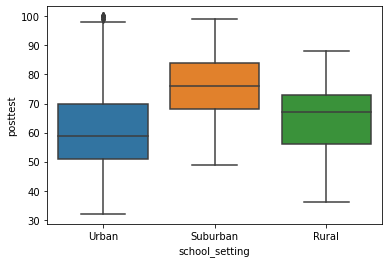

In [69]:
# school_setting별 성적 분포
sns.boxplot(data = df, x = "school_setting", y="posttest")
plt.show()


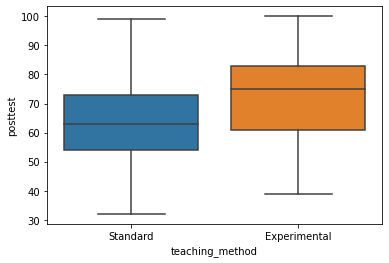

In [70]:
# teaching_method별 성적 분포
sns.boxplot(data = df, x = "teaching_method", y="posttest")
plt.show()


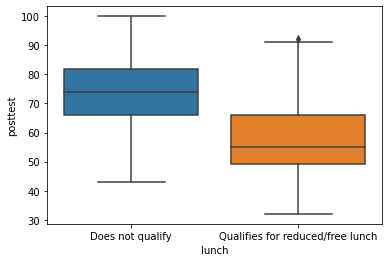

In [71]:
# lunch별 성적 분포
sns.boxplot(data = df, x = "lunch", y="posttest")
plt.show()

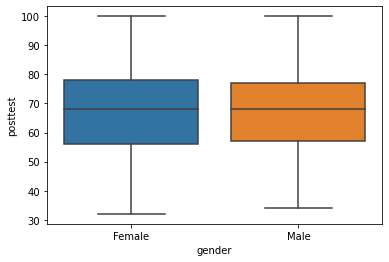

In [72]:
# gender별 성적 분포
sns.boxplot(data = df, x = "gender", y="posttest")
plt.show()

<AxesSubplot:xlabel='n_student', ylabel='posttest'>

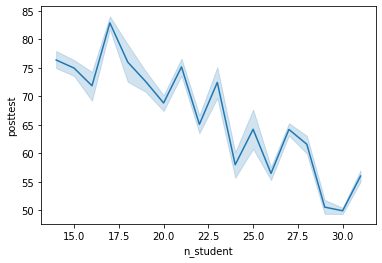

In [73]:
# 학생수별 성적 분포
sns.lineplot(data = df, x = "n_student", y="posttest")

<AxesSubplot:xlabel='pretest', ylabel='posttest'>

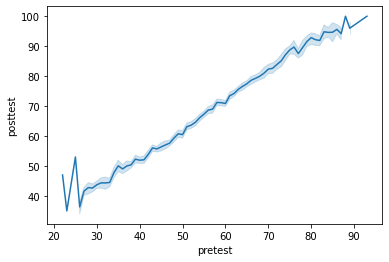

In [74]:
# 이전 성적(pretest)별 성적 분포
sns.lineplot(data = df, x = "pretest", y="posttest")

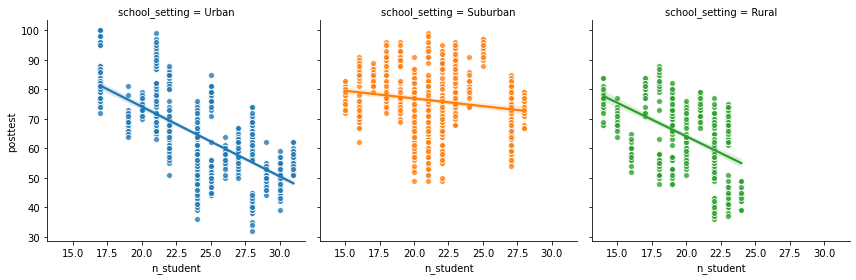

In [75]:
# Mutual Information 확인

feature = "n_student"

sns.lmplot(
    x= feature, y="posttest", hue="school_setting", col="school_setting",
    data=df, scatter_kws={"edgecolor": 'w'}, col_wrap=3, height=4,
);

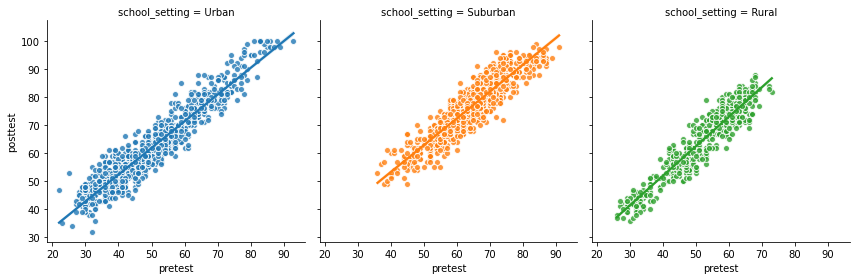

In [76]:
feature = "pretest"

sns.lmplot(
    x= feature, y="posttest", hue="school_setting", col="school_setting",
    data=df, scatter_kws={"edgecolor": 'w'}, col_wrap=3, height=4,
);

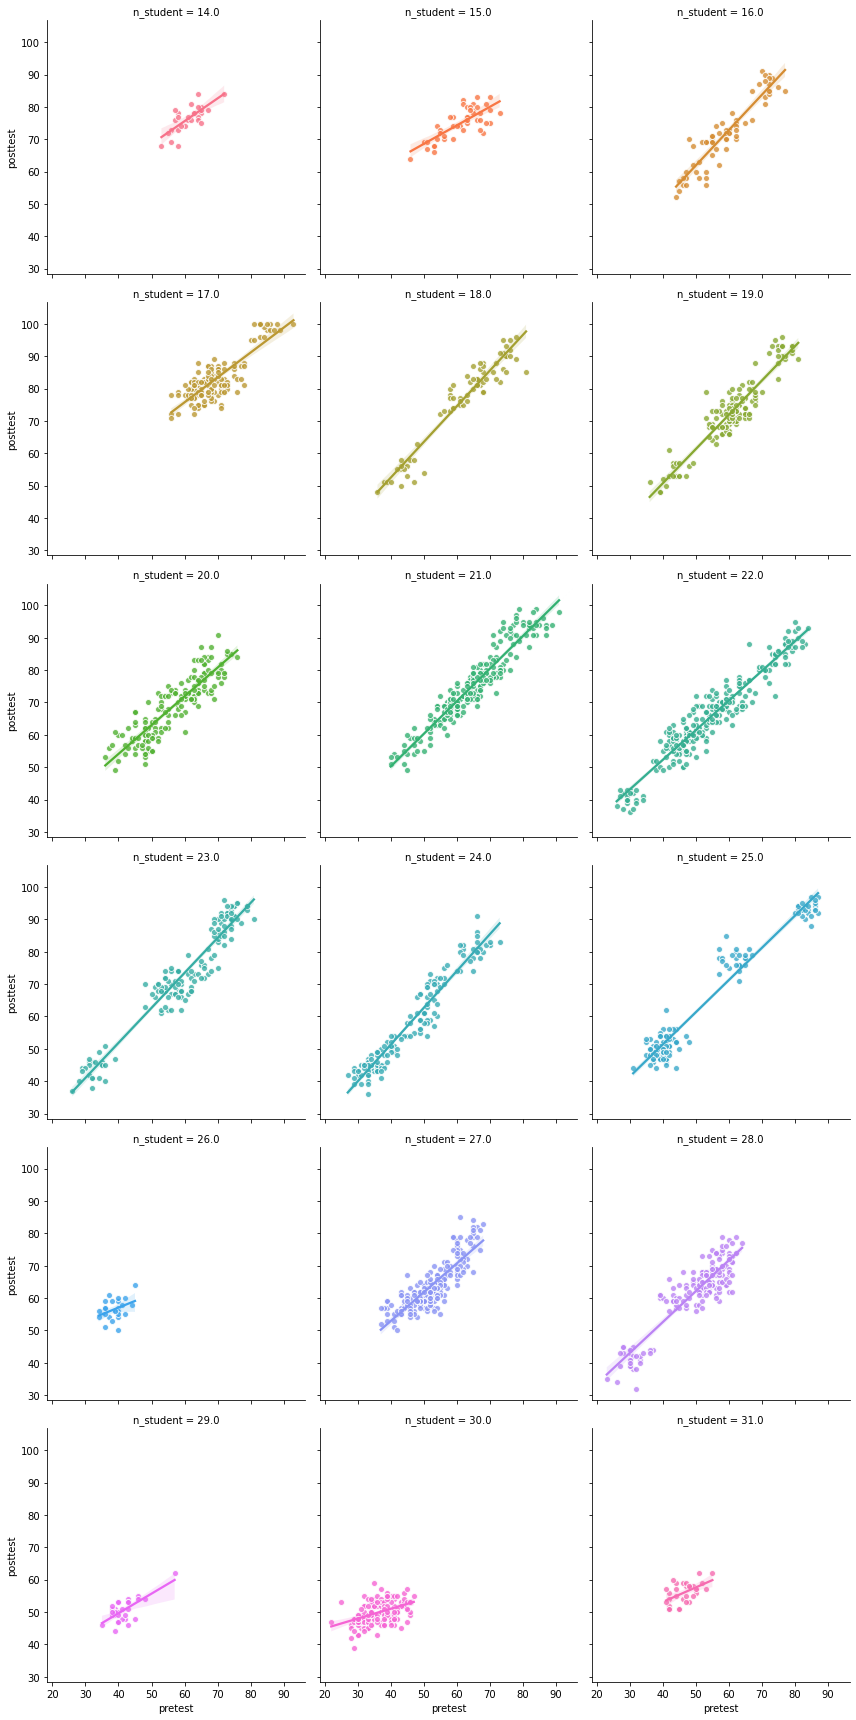

In [77]:
feature = "pretest"

sns.lmplot(
    x= feature, y="posttest", hue="n_student", col="n_student",
    data=df, scatter_kws={"edgecolor": 'w'}, col_wrap=3, height=4,
);

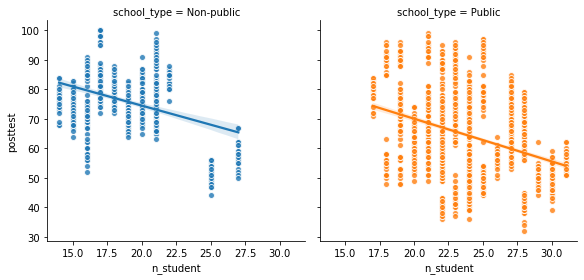

In [78]:
feature = "n_student"

sns.lmplot(
    x= feature, y="posttest", hue="school_type", col="school_type",
    data=df, scatter_kws={"edgecolor": 'w'}, col_wrap=3, height=4,
);

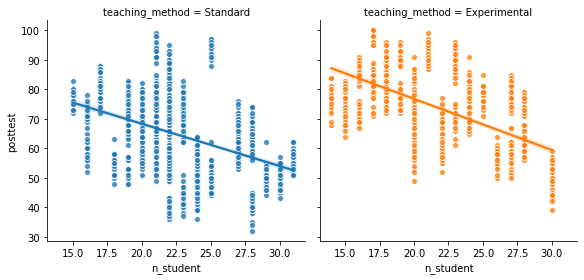

In [79]:
feature = "n_student"

sns.lmplot(
    x= feature, y="posttest", hue="teaching_method", col="teaching_method",
    data=df, scatter_kws={"edgecolor": 'w'}, col_wrap=3, height=4,
);

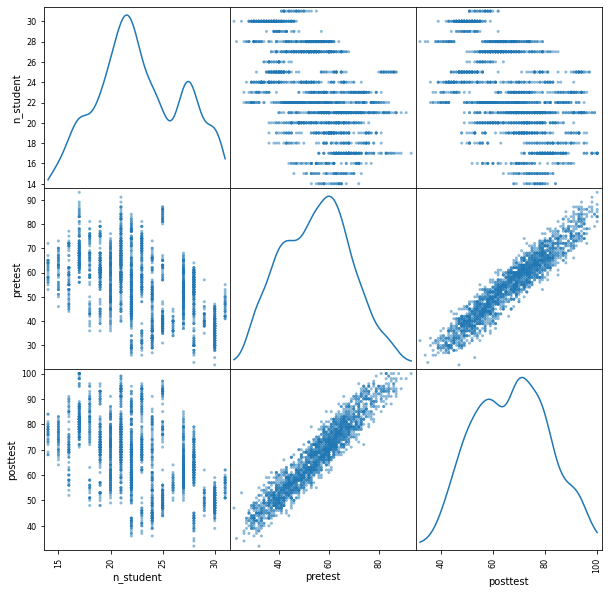

In [80]:
# 수치형 컬럼들을 산점도로 통해 시각화하여 살펴보기
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

scatter_matrix(df, alpha=0.5, figsize=(10, 10), diagonal='kde')
plt.show()

# 4. 기준 모델 및 평가지표

### ▶ 기준 모델 정하기

In [81]:
# 기준 모델이란 예측 모델을 구체적으로 만들기 전에 가장 간단하면서도 직관적이면서 최소한의 성능을 나타내는 기준이 되는 모델
# 기준 모델 생성 - 회귀문제이기 때문에 기준 모델은 평균값으로 설정하기

# 평균값으로 예측한다.
predict = df['posttest'].mean()

# 평균값으로 예측할 때 샘플 별 평균값과의 차이(error)를 저장한다. (잔차) 
errors = predict - df['posttest']

# MAE는 예측 error의 절대값 평균을 나타낸다. (잔차제곱합)
mean_absolute_error_1 = errors.abs().mean()

print('기준모델 값(평균) :', predict)
print('기준모델의 MAE :', mean_absolute_error_1)

기준모델 값(평균) : 67.10220346929208
기준모델의 MAE : 11.662091189090066


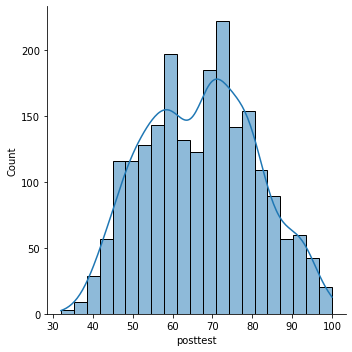

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.displot(df['posttest'],kde=True);

# 5. 데이터 전처리

### 5-1. 필요없는 컬럼 제거

In [83]:
# Cardinality 높은 컬럼 제거
df_drop = df.drop(["student_id", "classroom", "school"], axis=1)

# 필요없는 컬럼이 잘 제거되었는지 확인
df.shape, df_drop.shape

((2133, 11), (2133, 8))

In [84]:
# 필요없는 컬럼 drop 후 컬럼명 확인
df_drop.columns

Index(['school_setting', 'school_type', 'teaching_method', 'n_student',
       'gender', 'lunch', 'pretest', 'posttest'],
      dtype='object')

### 5-2. 타겟과 나머지 특성데이터 분리

In [85]:
# 타겟 데이터 : posttest 최종시험점수
target = "posttest"
df[target]

0       72.0
1       79.0
2       76.0
3       77.0
4       76.0
        ... 
2128    55.0
2129    46.0
2130    51.0
2131    53.0
2132    48.0
Name: posttest, Length: 2133, dtype: float64

### 5-3. 범주형 변수들에 대해 one-hot_encoding 수행

In [86]:
# # OneHotEncoder
# categorical -> onehot encoding
encoder = OneHotEncoder(use_cat_names = True)
df_enco = encoder.fit_transform(df_drop)

is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead


In [87]:
# onehot 실행 여부 확인
df_enco.head()

,school_setting_Urban,school_setting_Suburban,school_setting_Rural,school_type_Non-public,school_type_Public,teaching_method_Standard,teaching_method_Experimental,n_student,gender_Female,gender_Male,lunch_Does not qualify,lunch_Qualifies for reduced/free lunch,pretest,posttest
0,1,0,0,1,0,1,0,20.0,1,0,1,0,62.0,72.0
1,1,0,0,1,0,1,0,20.0,1,0,1,0,66.0,79.0
2,1,0,0,1,0,1,0,20.0,0,1,1,0,64.0,76.0
3,1,0,0,1,0,1,0,20.0,1,0,1,0,61.0,77.0
4,1,0,0,1,0,1,0,20.0,0,1,1,0,64.0,76.0


### (1) 원핫인코딩 후 산점도 확인

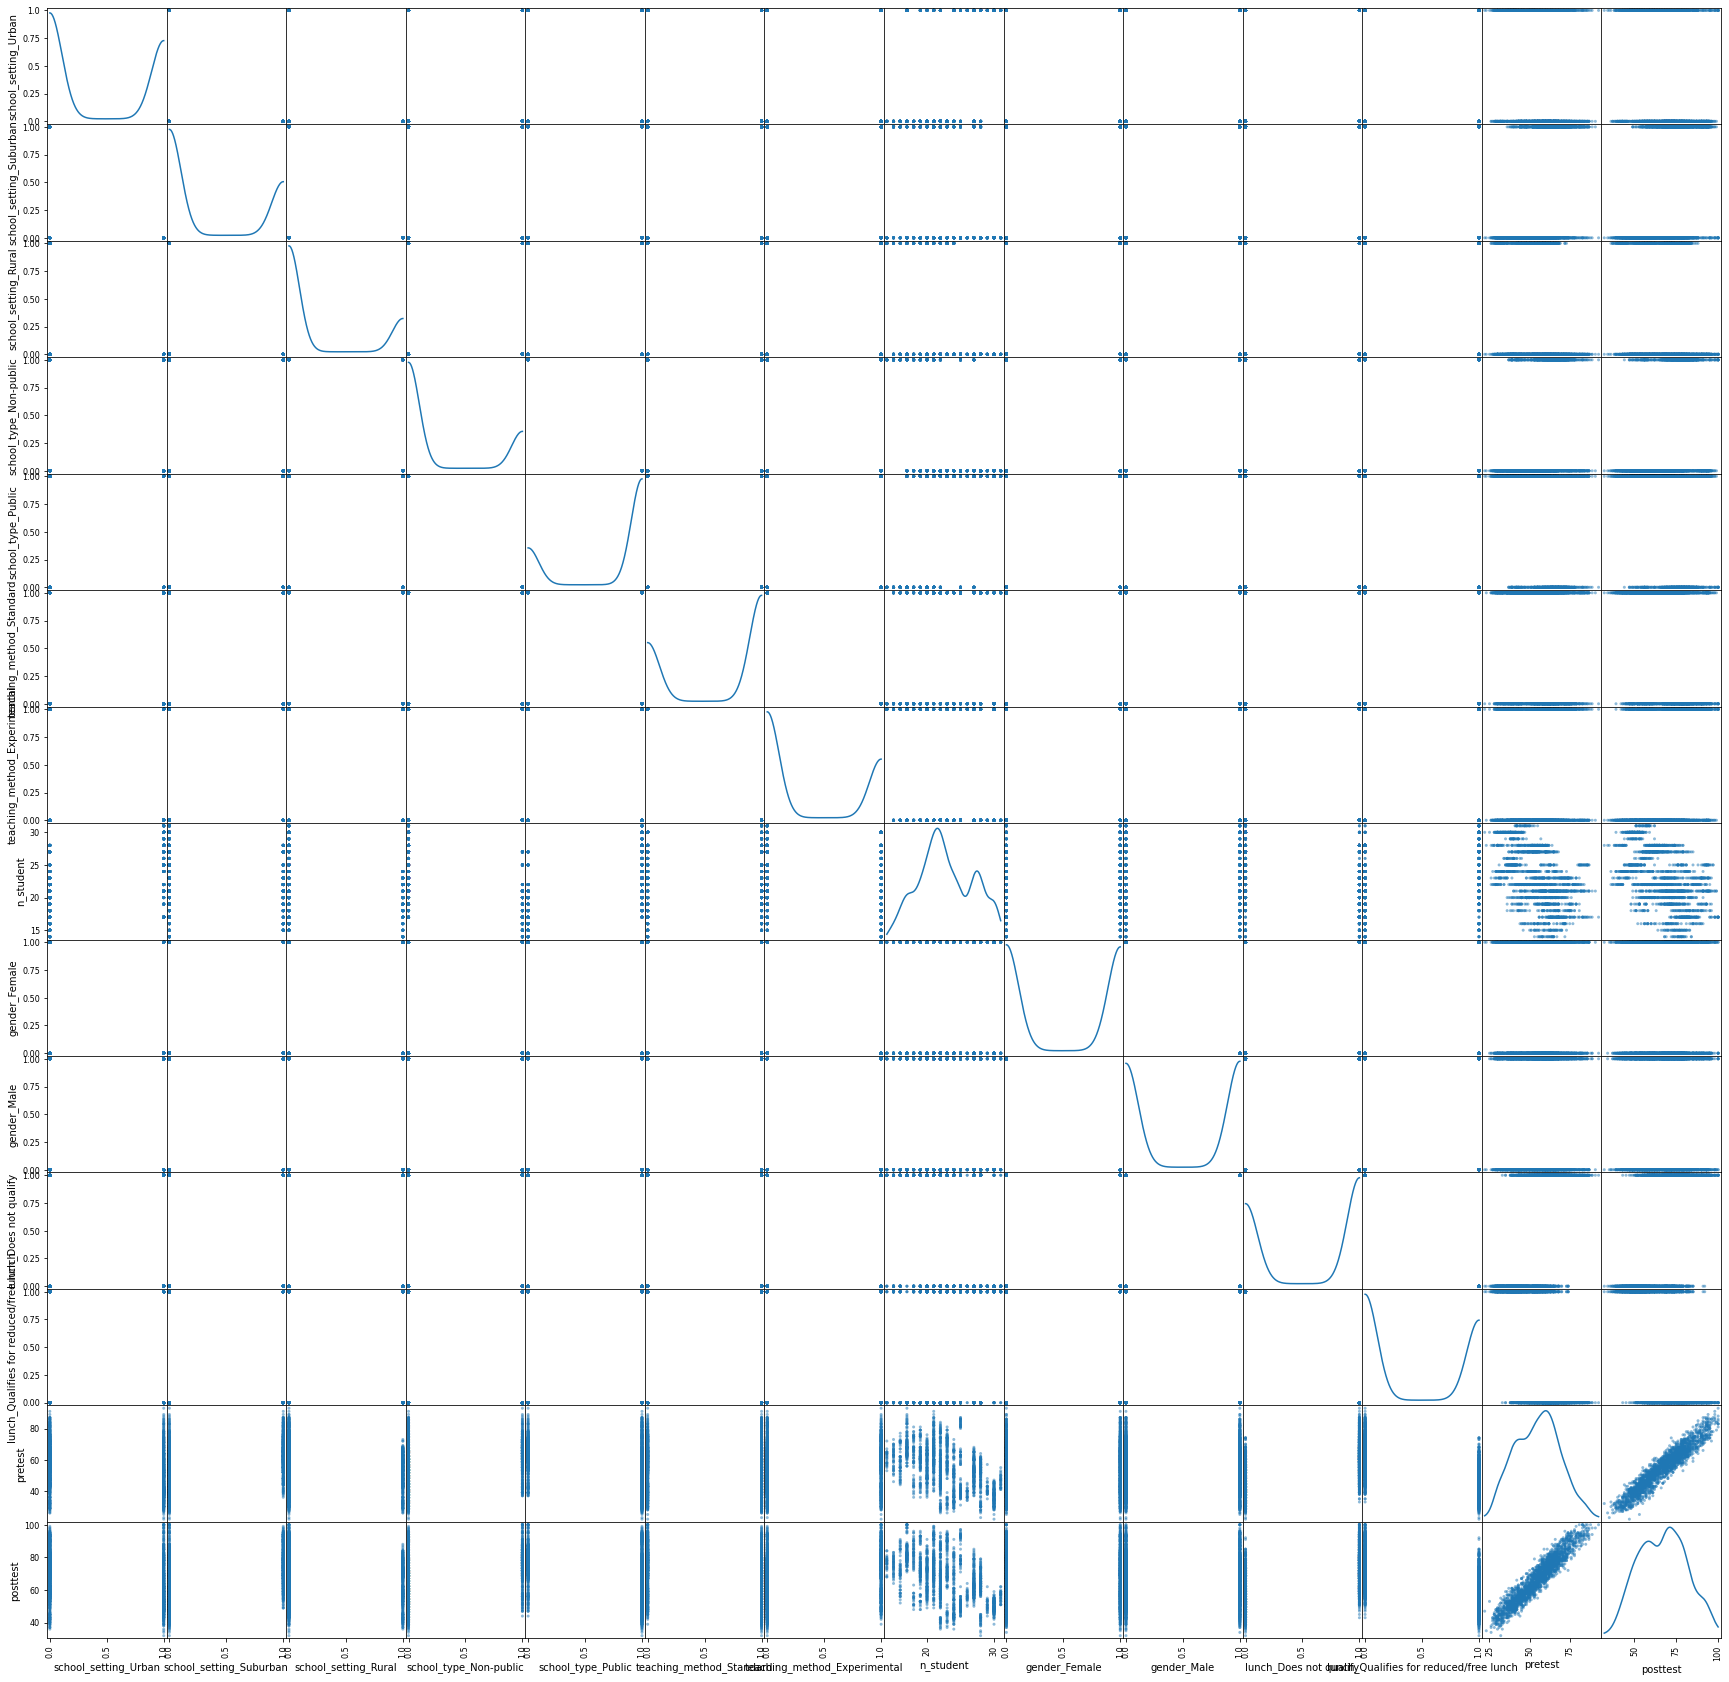

In [88]:
# 모든 컬럼들을 산점도로 통해 시각화하여 살펴보기
scatter_matrix(df_enco, alpha=0.5, figsize=(30, 30), diagonal='kde')
plt.show()

### (2) 상관계수 시각화

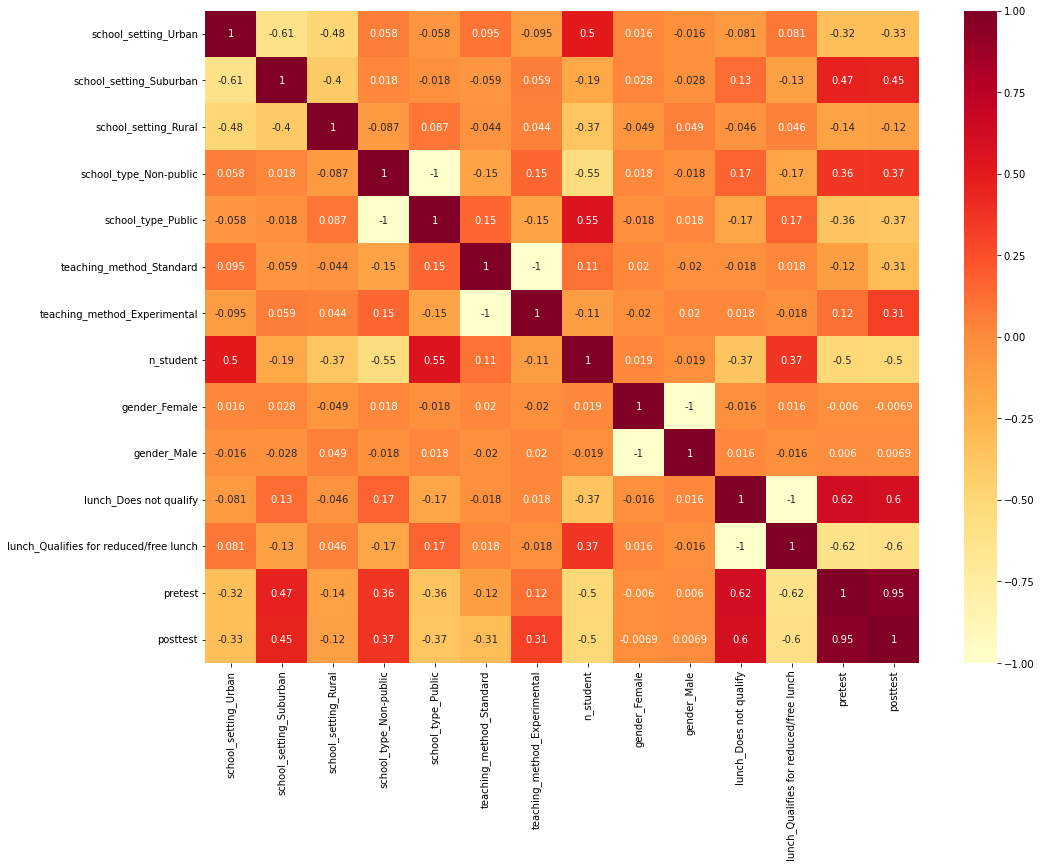

In [89]:
# 상관계수 파악 & 시각화로 살펴보기
# 상관계수 구하기
df_enco_corr = df_enco.corr()

# 상관계수 히트맵 확인
plt.figure(figsize=(16, 12))
sns.heatmap(df_enco_corr, annot=True, cmap="YlOrRd");

### (3) 상관계수 TOP 5

In [90]:
# 산점도와 상관계수를 통해 features가 target과 어떤 관계를 가지고 있는지 파악
# 1) 산점도 : pretest, lunch_Does not qualify, school_setting_Suburban 정도가 눈에 띔

# 2) 상관계수 : 순서대로 나열 후 상관계수 수치를 확인하여 feature 선택 여부 결정
df_target_corr = df_enco_corr[['posttest']].sort_values('posttest', ascending=False)
# BEST 5 : pretest, lunch_Does not qualify, school_setting_Suburban, school_type_Non-public,teaching_method_Experimental 
df_target_corr[1:6]

,posttest
pretest,0.950884
lunch_Does not qualify,0.598371
school_setting_Suburban,0.454704
school_type_Non-public,0.373916
teaching_method_Experimental,0.312884


### 5-4. 데이터세트 분리

In [91]:
# 전체 데이터 나누기 : 훈련용(80%), 테스트용(20%)
train, test = train_test_split(df_enco, test_size=0.2, random_state=2)

# 훈련용 데이터를 다시 나누기 : 훈련용(80%), 검증용(20%)
train, val = train_test_split(train, test_size=0.2, random_state=2)

# 사이즈 확인
train.shape, val.shape, test.shape                                                  
                                                    

((1364, 14), (342, 14), (427, 14))

In [92]:
# 모델 학습을 위해 훈련용, 검증용 데이터를 각각 features와 target으로 분류
y_train = train[target]
X_train = train.drop(target, axis=1)
y_val = val[target]
X_val = val.drop(target, axis=1)

# 테스트 데이터에 target값 제거
X_test = test.drop(target, axis=1)

# 사이즈 확인
y_train.shape, X_train.shape, y_val.shape, X_val.shape, X_test.shape

((1364,), (1364, 13), (342,), (342, 13), (427, 13))

###  5-5. SelectKBest를 사용해서 10개의 특성만 선택

In [93]:
# f_regresison, SelectKBest

## selctor 정의. 10개를 찾을 것이기에 k=10설정
selector = SelectKBest(score_func=f_regression, k=10)

## 학습 데이터에 fit_transform 
X_train_selected = selector.fit_transform(X_train, y_train)

## 테스트 데이터 transform
X_test_selected = selector.transform(X_test)

In [94]:
all_names = X_train.columns

## selector.get_support()
selected_mask = selector.get_support()

# 선택된 특성들
selected_names = all_names[selected_mask]

# 선택되지 않은 특성들
unselected_names = all_names[~selected_mask] 

# 어떤 컬럼이 선택/안 선택 되었는지 훑어보기
for i in selected_names:
    print('Selected names: ', i)
for i in unselected_names:
    print('unselected names: ', i)

Selected names:  school_setting_Urban
Selected names:  school_setting_Suburban
Selected names:  school_type_Non-public
Selected names:  school_type_Public
Selected names:  teaching_method_Standard
Selected names:  teaching_method_Experimental
Selected names:  n_student
Selected names:  lunch_Does not qualify
Selected names:  lunch_Qualifies for reduced/free lunch
Selected names:  pretest
unselected names:  school_setting_Rural
unselected names:  gender_Female
unselected names:  gender_Male


In [95]:
# selctor에서 점수 추출 (배열)
score = selector.scores_

# 가장 높은 점수의 인덱스 번호 추출
best_score_index = np.argmax(score)

# 학습 데이터셋 컬럼에서 인덱스번호에 해당하는 컬럼 이름 확인
all_names[best_score_index]

'pretest'

In [96]:
# drop unselected names columns
X_train.drop(columns=['school_setting_Rural','gender_Female','gender_Male'], inplace=True)
X_val.drop(columns=['school_setting_Rural','gender_Female','gender_Male'], inplace=True)
X_test.drop(columns=['school_setting_Rural','gender_Female','gender_Male'], inplace=True)

# 6. 머신러닝 모델 학습 및 평가

### 6-1. Linear Regression 모델 학습 및 평가

In [97]:
# 1) 훈련용 데이터로 예측값 도출
# 다중회귀모델 생성 & 학습
model_selected = LinearRegression().fit(X_train, y_train)

print('훈련 정확도: ', model_selected.score(X_train, y_train))
print('검증 정확도: ', model_selected.score(X_val, y_val))

# 학습한 모델에 train 데이터의 features를 넣고 훈련하여 예측값 도출
y_pred = model_selected.predict(X_train)

# train 데이터의 예측값과 실제 train 데이터의 target값을 비교 -> 스코어계산
mse = mean_squared_error(y_train, y_pred)
mae_train = mean_absolute_error(y_train, y_pred)
mse_train = mean_squared_error(y_train, y_pred)
rmse_train = mse ** 0.5
r2_train = r2_score(y_train, y_pred)

print("""
~ 테스트 데이터 학습 결과 평가 지표 ~
1. 평균 절대 오차 : {0}
2. 평균 제곱 오차 : {1}
3. 평균 제곱근 오차 : {2}
4. R-squared Score : {3}
""".format(mae_train, mse_train, rmse_train, r2_train))

훈련 정확도:  0.9469340771431995
검증 정확도:  0.9453540356194517

~ 테스트 데이터 학습 결과 평가 지표 ~
1. 평균 절대 오차 : 2.546670722974114
2. 평균 제곱 오차 : 10.409383008951663
3. 평균 제곱근 오차 : 3.226357545119831
4. R-squared Score : 0.9469340771431995



### 6-2. RidgeCV를 사용한 회귀모델 학습 및 평가

In [98]:
# 주어진 알파값을 리스트에 담기
alphas = [0, 0.001, 0.01, 0.1, 1] 

# ridgeCV 모델 생성 - normalize=True, cv=5
ridge = RidgeCV(alphas=alphas, normalize=True, cv=5)

# 모델 훈련
ridge.fit(X_train, y_train)

# alpha_, best_score_ 속성을 이용하여 가장 좋은 점수 및 해당 알파값 도출
print("alpha :", ridge.alpha_)
print("best score :", ridge.best_score_)

alpha : 0.0
best score : 0.9455661718275694


In [99]:
# 검증 피쳐 데이터를 앞서 훈련한 모델에 넣어 예측값 도출
y_pred = ridge.predict(X_val)

# 검증 타깃 데이터와 예측 데이터를 가지고 평균 절대 오차 구하기 
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_val, y_pred)

print("MAE :", mae)

MAE : 2.6059271106732496


### 6-3. 하이퍼파라미터 조절

### ▶ SelecteKBest로 feature 선택하기

In [100]:
# feature - 10개 선택

# SelecteKBest 객체 생성
selector_10 = SelectKBest(score_func=f_regression, k=10)
    
# 훈련용 데이터 : fit_transform, 테스트 데이터 : transform
X_train_selected_10 = selector_10.fit_transform(X_train, y_train)
X_val_selected_10 = selector_10.transform(X_val)
    
# 어떤 features가 선택되었는지 확인
all_names = X_train.columns
selected_mask = selector_10.get_support()
selected_names = all_names[selected_mask]
# 1) 훈련용 데이터로 예측값 도출
# 다중회귀모델 생성 & 학습
model_selected = LinearRegression().fit(X_train, y_train)

print('훈련 정확도: ', model_selected.score(X_train, y_train))
print('검증 정확도: ', model_selected.score(X_val, y_val))

# 학습한 모델에 train 데이터의 features를 넣고 훈련하여 예측값 도출
y_pred = model_selected.predict(X_train)

# train 데이터의 예측값과 실제 train 데이터의 target값을 비교 -> 스코어계산
mse = mean_squared_error(y_train, y_pred)
mae_train = mean_absolute_error(y_train, y_pred)
mse_train = mean_squared_error(y_train, y_pred)
rmse_train = mse ** 0.5
r2_train = r2_score(y_train, y_pred)

print("""
~ 테스트 데이터 학습 결과 평가 지표 ~
1. 평균 절대 오차 : {0}
2. 평균 제곱 오차 : {1}
3. 평균 제곱근 오차 : {2}
4. R-squared Score : {3}
""".format(mae_train, mse_train, rmse_train, r2_train))

print('10 features selected - names: ', selected_names)

훈련 정확도:  0.9469340771431995
검증 정확도:  0.9453540356194517

~ 테스트 데이터 학습 결과 평가 지표 ~
1. 평균 절대 오차 : 2.546670722974114
2. 평균 제곱 오차 : 10.409383008951663
3. 평균 제곱근 오차 : 3.226357545119831
4. R-squared Score : 0.9469340771431995

10 features selected - names:  Index(['school_setting_Urban', 'school_setting_Suburban',
       'school_type_Non-public', 'school_type_Public',
       'teaching_method_Standard', 'teaching_method_Experimental', 'n_student',
       'lunch_Does not qualify', 'lunch_Qualifies for reduced/free lunch',
       'pretest'],
      dtype='object')


1 features
Selected names:  Index(['pretest'], dtype='object')
Test MAE: 3.434356221877476
Test R2: 0.9019420805428129 

2 features
Selected names:  Index(['lunch_Does not qualify', 'pretest'], dtype='object')
Test MAE: 3.381963912533913
Test R2: 0.9033043425788045 

3 features
Selected names:  Index(['lunch_Does not qualify', 'lunch_Qualifies for reduced/free lunch',
       'pretest'],
      dtype='object')
Test MAE: 3.3860223515297725
Test R2: 0.9029906854945265 

4 features
Selected names:  Index(['n_student', 'lunch_Does not qualify',
       'lunch_Qualifies for reduced/free lunch', 'pretest'],
      dtype='object')
Test MAE: 3.0238720722264967
Test R2: 0.9246206698955531 

5 features
Selected names:  Index(['school_setting_Suburban', 'n_student', 'lunch_Does not qualify',
       'lunch_Qualifies for reduced/free lunch', 'pretest'],
      dtype='object')
Test MAE: 2.918759782777326
Test R2: 0.9270310471224057 

6 features
Selected names:  Index(['school_setting_Suburban', 'school_t

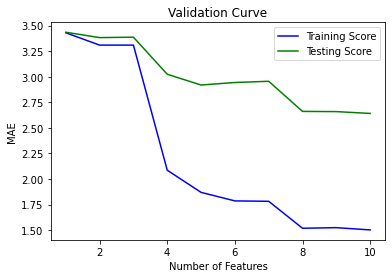

In [101]:
training = []
testing = []
ks = range(1, len(X_train.columns)+1)

# 1 부터 특성 수 만큼 사용한 모델을 만들어서 MAE 값을 비교 합니다.
for k in range(1, len(X_train.columns)+ 1):
    print(f'{k} features')
    
    selector = SelectKBest(score_func=f_regression, k=k) 
    
    X_train_selected = selector.fit_transform(X_train, y_train)
    X_val_selected = selector.transform(X_val)
    
    all_names = X_train.columns
    selected_mask = selector.get_support()
    selected_names = all_names[selected_mask]
    print('Selected names: ', selected_names)

    
    model = RandomForestRegressor()
    model.fit(X_train_selected, y_train)
    y_pred = model.predict(X_train_selected)
    mae = mean_absolute_error(y_train, y_pred)
    training.append(mae)
    
    y_pred = model.predict(X_val_selected)
    mae = mean_absolute_error(y_val, y_pred)
    r2 = r2_score(y_val, y_pred)
    testing.append(mae)
    print(f'Test MAE: {mae:}')
    print(f'Test R2: {r2} \n')

plt.plot(ks, training, label='Training Score', color='b')
plt.plot(ks, testing, label='Testing Score', color='g')
plt.ylabel("MAE")
plt.xlabel("Number of Features")
plt.title('Validation Curve')
plt.legend()
plt.show()

In [102]:
# 선택된 피쳐들만 있는 데이터세트로 RidgeCV 사용

def RidgeCVRegression(degree=3, **kwargs):
    return make_pipeline(PolynomialFeatures(degree), 
                         RidgeCV(**kwargs))

# 여러 람다값은 alpha 인자값을 다양하게 시도해본다. -> 여기서는 0부터 1까지, 0.01단위로 증가하며 비교
alphas = np.arange(0, 1, 0.01)

# RidgeCV 객체 생성 및 모델 훈련
model = RidgeCVRegression(alphas=alphas, normalize=True, cv=5)

# 모델 fit
model.fit(X_train_selected_10, y_train)

# 훈련용 데이터로 예측값 도출
y_pred_10 = model.predict(X_train_selected_10)

# 모델 평가
mae = mean_absolute_error(y_train, y_pred_10)
r2 = r2_score(y_train, y_pred_10)
print(f'Test MAE: {mae:,.0f}')
print(f'R2 Score: {r2:,.4f}\n')

# 최적의 alpha값 & best_score 확인
print(f'alpha: {model.named_steps["ridgecv"].alpha_}')
print(f'cv best score: {model.named_steps["ridgecv"].best_score_}')

Test MAE: 2
R2 Score: 0.9496

alpha: 0.01
cv best score: 0.9452841936817251


In [103]:
# 비교 1) : 람다값이 0일 때
model_alpha_0 = RidgeCVRegression(alphas=[0], normalize=True, cv=5)

# 모델 훈련
model_alpha_0.fit(X_train_selected_10, y_train)

# 예측값 도출
y_pred_alpha_0 = model_alpha_0.predict(X_train_selected_10)

# 오차 확인
mae = mean_absolute_error(y_train, y_pred_alpha_0)
r2 = r2_score(y_train, y_pred_alpha_0)
print(f'Test MAE: {mae:,.0f}')
print(f'R2 Score: {r2:,.4f}\n')
print(f'cv best score: {model_alpha_0.named_steps["ridgecv"].best_score_}')

Test MAE: 2
R2 Score: 0.9512

cv best score: 0.9423993918085666


- R2 스코어는 다소 높아졌으나, best_score는 오히려 줄어들었다.

In [104]:
# 비교 2) : 다중회귀일때 

def PolynomialRegression(degree=3, **kwargs):
    return make_pipeline(PolynomialFeatures(degree), 
                         LinearRegression(**kwargs))
    
# 모델 생성 및 학습    
poly = PolynomialRegression(normalize=True)
poly.fit(X_train_selected_10, y_train)

# 예측값
y_pred_linear_10 = poly.predict(X_train_selected_10)


# 오차 확인
mae = mean_absolute_error(y_train, y_pred_linear_10)
r2 = r2_score(y_train, y_pred_linear_10)
print(f'Test MAE: {mae:,.0f}')
print(f'R2 Score: {r2:,.4f}\n')

Test MAE: 3
R2 Score: 0.9188



- 다중회귀모델을 사용하니 MAE는 높아지고 R2 Score는 낮아졌다. 

### 6-4. 다양한 파이프라인 만들어서 모델 학습 및 평가

In [105]:
# pipe1 : 오디널인코더, 랜덤포레스트 리그레서 

ordinals = ["n_student", "pretest"]

pipe1 = make_pipeline(
    OrdinalEncoder(cols=ordinals),
    SimpleImputer(strategy='mean'),
    StandardScaler(),
    SelectKBest(f_regression, k=10),
    RandomForestRegressor(n_jobs=-1, random_state=10, oob_score=True, n_estimators = 150, min_samples_split = 6)
)

# 1) 훈련용 데이터로 예측값 도출
# 파이프라인 학습
pipe1 = pipe1.fit(X_train, y_train)

print('<pipe1 평가>\n')

print('훈련 정확도: ', pipe1.score(X_train, y_train))
print('검증 정확도: ', pipe1.score(X_val, y_val))


# 학습한 모델에 훈련용 데이터의 features를 넣고 훈련하여 예측값 도출
y_pred_train = pipe1.predict(X_train)


# 2) 검증용 데이터로 예측값 도출
# 학습한 모델에 검증용 데이터의 features를 넣고 훈련하여 예측값 도출
y_pred_val = model_selected.predict(X_val)


# 평가
mse = mean_squared_error(y_val, y_pred_val)
mae_test = mean_absolute_error(y_val, y_pred_val)
mse_test = mean_squared_error(y_val, y_pred_val)
rmse_test = mse ** 0.5
r2_test = r2_score(y_val, y_pred_val)

print("""
~ Pipe1 학습 결과 평가 지표 ~
1. 평균 절대 오차 : {0}
2. 평균 제곱 오차 : {1}
3. 평균 제곱근 오차 : {2}
4. R-squared Score : {3}
""".format(mae_test, mse_test, rmse_test, r2_test))

is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead


<pipe1 평가>

훈련 정확도:  0.9579549121593027
검증 정확도:  0.8862129332110519

~ Pipe1 학습 결과 평가 지표 ~
1. 평균 절대 오차 : 2.6059271106732504
2. 평균 제곱 오차 : 10.174665653399678
3. 평균 제곱근 오차 : 3.1897751728608834
4. R-squared Score : 0.9453540356194517



- pipe1의 경우 훈련정확도 값만 높은 것을 보아 과적합으로 예상된다.

In [106]:
# pipe2 : 오디널인코더, 리니어 리그레서

pipe2 = make_pipeline(
    OrdinalEncoder(cols=ordinals),
    SimpleImputer(strategy='mean'),
    StandardScaler(),
    SelectKBest(f_regression, k=10),
    LinearRegression()
    )


# 1) 훈련용 데이터로 예측값 도출
# 파이프라인 학습
pipe2 = pipe2.fit(X_train, y_train)

print('<pipe2 평가>\n')

print('훈련 정확도: ', pipe2.score(X_train, y_train))
print('검증 정확도: ', pipe2.score(X_val, y_val))


# 학습한 모델에 훈련용 데이터의 features를 넣고 훈련하여 예측값 도출
y_pred_train = pipe2.predict(X_train)


# 2) 검증용 데이터로 예측값 도출
# 학습한 모델에 검증용 데이터의 features를 넣고 훈련하여 예측값 도출
y_pred_val = model_selected.predict(X_val)


# 평가
mse = mean_squared_error(y_val, y_pred_val)
mae_test = mean_absolute_error(y_val, y_pred_val)
mse_test = mean_squared_error(y_val, y_pred_val)
rmse_test = mse ** 0.5
r2_test = r2_score(y_val, y_pred_val)

print("""
~ Pipe2 학습 결과 평가 지표 ~
1. 평균 절대 오차 : {0}
2. 평균 제곱 오차 : {1}
3. 평균 제곱근 오차 : {2}
4. R-squared Score : {3}
""".format(mae_test, mse_test, rmse_test, r2_test))

<pipe2 평가>

훈련 정확도:  0.6473154559348038
검증 정확도:  0.6213261386908298

~ Pipe2 학습 결과 평가 지표 ~
1. 평균 절대 오차 : 2.6059271106732504
2. 평균 제곱 오차 : 10.174665653399678
3. 평균 제곱근 오차 : 3.1897751728608834
4. R-squared Score : 0.9453540356194517



is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead


In [107]:
# pipe3 : 결정트리

pipe3 = make_pipeline(
    OrdinalEncoder(cols=ordinals),
    SelectKBest(f_regression, k=10),
    DecisionTreeRegressor(max_depth=5, random_state=2)  # max_depth 가 5인 경우 훈련,검증 정확도가 잘 나옴
)

# 1) 훈련용 데이터로 예측값 도출
# 파이프라인 학습
pipe3 = pipe3.fit(X_train, y_train)

print('<pipe3 평가>\n')

print('훈련 정확도: ', pipe3.score(X_train, y_train))
print('검증 정확도: ', pipe3.score(X_val, y_val))


# 학습한 모델에 훈련용 데이터의 features를 넣고 훈련하여 예측값 도출
y_pred_train = pipe3.predict(X_train)


# 2) 검증용 데이터로 예측값 도출
# 학습한 모델에 검증용 데이터의 features를 넣고 훈련하여 예측값 도출
y_pred_val = model_selected.predict(X_val)


# 평가
mse = mean_squared_error(y_val, y_pred_val)
mae_test = mean_absolute_error(y_val, y_pred_val)
mse_test = mean_squared_error(y_val, y_pred_val)
rmse_test = mse ** 0.5
r2_test = r2_score(y_val, y_pred_val)

print("""
~ Pipe3 학습 결과 평가 지표 ~
1. 평균 절대 오차 : {0}
2. 평균 제곱 오차 : {1}
3. 평균 제곱근 오차 : {2}
4. R-squared Score : {3}
""".format(mae_test, mse_test, rmse_test, r2_test))

<pipe3 평가>

훈련 정확도:  0.7887930352984676
검증 정확도:  0.763384985676691

~ Pipe3 학습 결과 평가 지표 ~
1. 평균 절대 오차 : 2.6059271106732504
2. 평균 제곱 오차 : 10.174665653399678
3. 평균 제곱근 오차 : 3.1897751728608834
4. R-squared Score : 0.9453540356194517



is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead


In [140]:
# pipe4 : XGBRegressor

pipe4 = make_pipeline(
    xgboost.XGBRegressor()
)

# xgboost.XGBRegressor().fit(X_train, y_train)

# 1) 훈련용 데이터로 예측값 도출
# 파이프라인 학습
pipe4 = pipe4.fit(X_train, y_train)

print('<pipe4 평가>\n')

print('훈련 정확도: ', pipe4.score(X_train, y_train))
print('검증 정확도: ', pipe4.score(X_val, y_val))


# 학습한 모델에 훈련용 데이터의 features를 넣고 훈련하여 예측값 도출
y_pred_train = pipe4.predict(X_train)


# 2) 검증용 데이터로 예측값 도출
# 학습한 모델에 검증용 데이터의 features를 넣고 훈련하여 예측값 도출
y_pred_val = model_selected.predict(X_val)


# 평가
mse = mean_squared_error(y_val, y_pred_val)
mae_test = mean_absolute_error(y_val, y_pred_val)
mse_test = mean_squared_error(y_val, y_pred_val)
rmse_test = mse ** 0.5
r2_test = r2_score(y_val, y_pred_val)

print("""
~ Pipe4 학습 결과 평가 지표 ~
1. 평균 절대 오차 : {0}
2. 평균 제곱 오차 : {1}
3. 평균 제곱근 오차 : {2}
4. R-squared Score : {3}
""".format(mae_test, mse_test, rmse_test, r2_test))

<pipe4 평가>

훈련 정확도:  0.9798841599998704
검증 정확도:  0.9423817403559274

~ Pipe4 학습 결과 평가 지표 ~
1. 평균 절대 오차 : 2.6059271106732504
2. 평균 제곱 오차 : 10.174665653399678
3. 평균 제곱근 오차 : 3.1897751728608834
4. R-squared Score : 0.9453540356194517



# 7. 최종 테스트 값 확인 & SHAP 시각화
### 7-1. 최종모델로 실제값과 모델이 예측한 값 비교

In [147]:
row = X_test.iloc[[1]]  # 중첩 brackets을 사용하면 결과물이 DataFrame입니다
y_test = test[target]

# 실제 점수값
y_test.iloc[[1]]

731    44.0
Name: posttest, dtype: float64

In [148]:
# 최종모델이 예측한 값
model_selected.predict(row)

array([40.72797825])

- 실제 점수값 44.0에 대하여 최종 모델 (Linear Regression)로 예측 결과 40.7이 나왔습니다.

### 7-2. SHAP 시각화

In [116]:
# 모델이 이렇게 예측한 이유를 알기 위하여 SHAP Force Plot을 그려보겠습니다.

model = xgboost.XGBRegressor().fit(X_train, y_train)

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(row)

shap.initjs()
shap.force_plot(
    base_value=explainer.expected_value, 
    shap_values=shap_values,
    features=row
)

- pretest는 posttest에 가장 큰 영향을 준다.

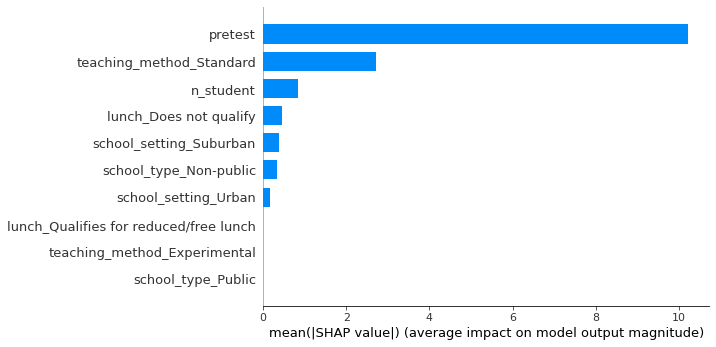

In [122]:
# summary plot
shap_values = explainer.shap_values(X_train)
shap.summary_plot(shap_values, X_train, plot_type='bar')

- pretest, teaching_method_Standard, n_student 순으로 Posttest을 올리는데 영향을 준다.

In [125]:
# 300개 테스트 샘플에 대해서 각 특성들의 영향을 봅니다. 샘플 수를 너무 크게 잢으면 계산이 오래걸리니 주의
shap_values = explainer.shap_values(X_test.iloc[:300])
shap.force_plot(explainer.expected_value, shap_values, X_test.iloc[:300])

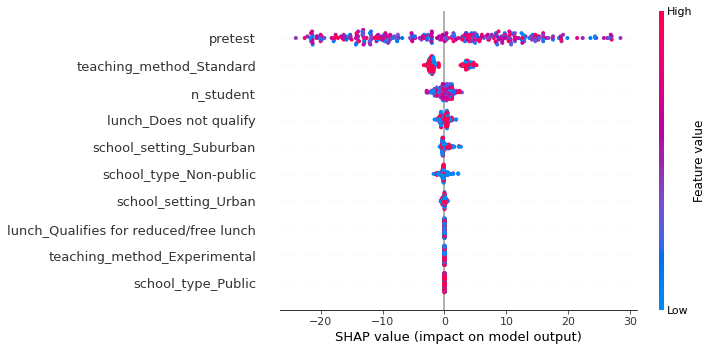

In [126]:
#전체 특성이 shap value에 어떻게 영향을 주는지 살펴볼 수 있음
shap_values = explainer.shap_values(X_test.iloc[:300])
shap.summary_plot(shap_values, X_train.iloc[:300])

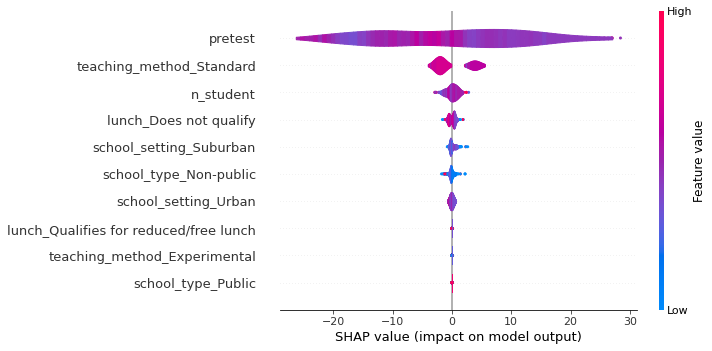

In [127]:
#빨간색은 특성의 값 자체가 큰 경우, 파란색은 특성의 값 자체가 작은 경우
shap.summary_plot(shap_values, X_train.iloc[:300], plot_type="violin")